# APPLIED MACHINE LEARNING

## LAB ACTIVITIES (LAB 6)

### 28/11/19

## CONVOLUTIONAL NEURAL NETWORK WITH KERAS

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0,1"
os.environ['TF_ENABLE_AUTO_MIXED_PRECISION'] = '1'

In [2]:
import tensorflow as tf

In [3]:
# plot ad hoc MNIST instances
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [4]:
# to see versions
import sys
print('Python version : ', sys.version)
print('Keras version : ', keras.__version__)
print('tensorflow versio : ', tf.__version__)
from tensorflow.python.platform import build_info as tf_build_info
print('cuda version',tf_build_info.build_info['cuda_version'])

Python version :  3.8.10 (default, Mar 15 2022, 12:22:08) 
[GCC 9.4.0]
Keras version :  2.9.0
tensorflow versio :  2.9.1
cuda version 11.2


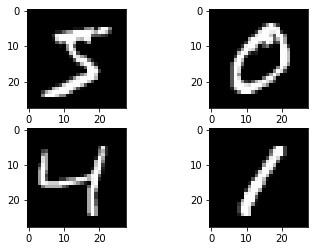

In [5]:
# load (downloaded if needed) the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# plot 4 images as gray scale
%matplotlib inline
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

Let us import other classes and functions needed, Again, we always initialise the random number
generator to a constant seed value for reproducibility of results.

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# fix random seed for reproducibility
import numpy as np
np.random.seed(7)

Let us use version functions to see the versions of Python, TensorFlow and Keras.

As we already loaded the MNIST dataset, we now just reshape it so that it is suitable for use
training a CNN. In Keras, the layers used for two-dimensional convolutions (Conv2D) expect pixel
values with the dimensions [height][width][channels]. In the case of RGB, the first-
dimension channels would be 3 for the red, green and blue components and it would be like having
3 image inputs for every colour image. In the case of MNIST where the channels values are grey
scale, the pixel dimension is set to 1.

In [7]:
img_rows = 28
img_cols = 28
input_shape = (img_rows, img_cols, 1)
# reshape to be [samples][height][width][channels]
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

As before, it is a good idea to normalise the pixel values to the range 0 and 1 and one hot encode
the output variable.

In [8]:
# normalise inputs from 0-255 to 0-1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

Let’s print to see the input shape.

In [9]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Let’s do hot encode outputs for labels. A one hot encoding is a representation of categorical
variables as binary vectors. This first requires that the categorical values be mapped to integer
values. Then, each integer value is represented as a binary vector that is all zero values except the
index of the integer, which is marked with a 1. For example, if we had the sequence: ‘red’, ‘red’,
‘green’. We could represent it with the integer encoding: 0, 0, 1. And one hot encoding of

[1, 0]

[1, 0]

[0, 1]

We would like to give the network more expressive power to learn a probability-like number for
each possible label value.

In [10]:
# one hot encode outputs
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

<img src="mnistnet.png">

In [11]:
from tensorflow.python.keras import backend as K

In [13]:

def setup_model():
    model = keras.Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1000, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model


model = setup_model()
        
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

2022-06-27 11:34:06.357289: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-27 11:34:06.357827: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-27 11:34:06.363791: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-27 11:34:06.364514: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-27 11:34:06.365184: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

Compile and fit the model. The CNN is fit over 12 epochs with a batch size of 128 as defined
above. The verbose setting changes the way you see the training progress for each epoch. For
example, verbose = 0 will show you nothing (silent), verbose = 1 will show you an animated
progress bar like this:
and verbose = 2 will just mention the
number of epoch like this: Epoch 1/10

In [14]:

opt = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
# these values are chosen via trial and error
batch_size = 512
epochs = 10

gpus=0

model.compile(optimizer=opt, loss=loss, metrics=metrics)

# fit the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10


2022-06-27 11:34:25.299334: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


118/118 [==============================] - 3s 11ms/step - loss: 0.2911 - accuracy: 0.9096 - val_loss: 0.0598 - val_accuracy: 0.9811
Epoch 2/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0664 - accuracy: 0.9791 - val_loss: 0.0347 - val_accuracy: 0.9880
Epoch 3/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0462 - accuracy: 0.9853 - val_loss: 0.0306 - val_accuracy: 0.9887
Epoch 4/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0376 - accuracy: 0.9881 - val_loss: 0.0308 - val_accuracy: 0.9903
Epoch 5/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0296 - accuracy: 0.9908 - val_loss: 0.0233 - val_accuracy: 0.9912
Epoch 6/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0255 - accuracy: 0.9918 - val_loss: 0.0263 - val_accuracy: 0.9911
Epoch 7/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.0199 - val_accuracy: 0.9931
Epoch 8/10
118/1

In [15]:
result = model.evaluate(x_test, y_test, use_multiprocessing=True, verbose=0)
y_pred = model.predict(x_test, use_multiprocessing=True).argmax(axis=1)

313/313 [==============================] - 0s 1ms/step


In [16]:
result

[0.020637406036257744, 0.9921000003814697]

In [17]:
wrong_ones = (y_pred != y_test.argmax(axis=1)).sum()
print ("Number of wrong cases = %d"%wrong_ones)

Number of wrong cases = 79


In [18]:
WrongCases = np.where(y_pred != y_test.argmax(axis=1))

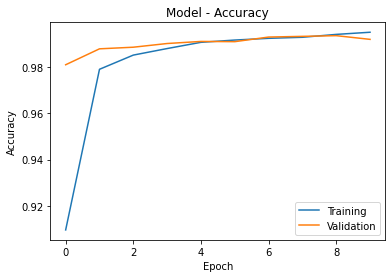

In [19]:
print(history)
fig1, ax_acc = plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

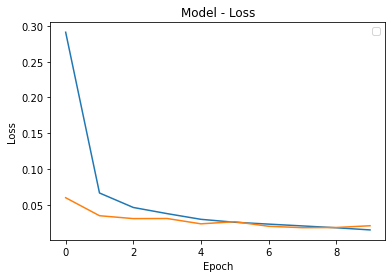

In [20]:
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model - Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

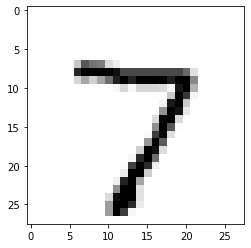

The Answer is  7


In [21]:
n = 0
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()
print('The Answer is ', y_pred[n])

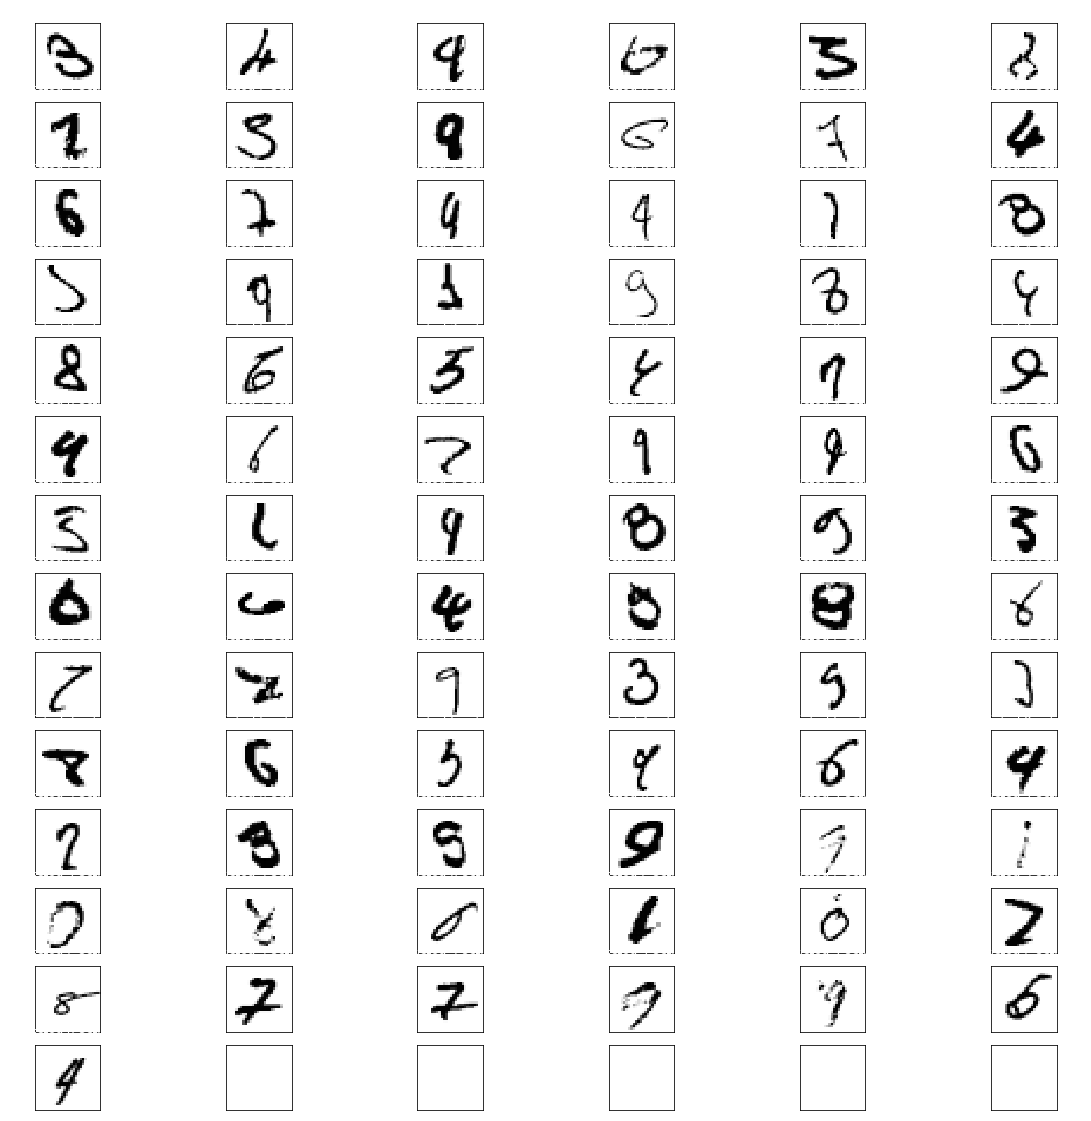

In [22]:
nrows = int(np.ceil(wrong_ones/6))
ncols = 6
plotnum = 0

fig, axs = plt.subplots(nrows=nrows, ncols=6, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

row = 0
col = -1

for n in WrongCases[0]:
    col = col +1
    if col == 6:
        col = 0
        row = row + 1
    #    plotnum = plotnum + 1
#    plt.subplot(nrows, ncols, plotnum)    
    axs[row,col].imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    axs[row,col].set_title('Predicted %d actual %d' %(y_pred[n], y_test[n].argmax()), color='white')
    
for i in range(col + 1, 6):
    axs[row,i].imshow(np.array([0,0,0,0]).reshape(2,2), cmap='Greys', interpolation='nearest')